<a href="https://colab.research.google.com/github/Unalunapark/practice/blob/main/5_2_type2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 에어비엔비 가격?
- 평가: R-Squared, MAE, MSE, RMSE, RMSLE, MAPE
- target : price(가격)
- csv파일 생성 : 수험번호.csv (예시 아래 참조)
~~~
id,price
34323697,238
29927138,183
120362,234
~~~



## 데이터 불러오기

In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")
print(train.shape, test.shape)

(39116, 16) (9779, 15)


##EDA

In [ ]:
train.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,35742633,Luxury new 1 bed apartment in East Williamsburg,265866685,Mindy,Brooklyn,Bushwick,40.69796,-73.92915,Entire home/apt,30,0,NaN,NaN,2,179,198
1,15840089,Kid- (and Adult-) Friendly Uptown 2-Bedroom,99602138,Yolanda,Manhattan,Washington Heights,40.83490,-73.94829,Entire home/apt,3,36,2019-01-01,1.13,1,5,150
2,24495605,Brooklyn Art Residence,75173477,Lara,Brooklyn,Bushwick,40.69932,-73.91191,Entire home/apt,3,7,2019-05-05,0.48,1,6,200


In [ ]:
test.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34323697,Sonder | The Biltmore | Bright 1BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Theater District,40.75965,-73.98652,Entire home/apt,29,0,NaN,NaN,327,338
1,29927138,A great space in NYC,158461160,Sophia,Brooklyn,Bedford-Stuyvesant,40.68062,-73.94418,Entire home/apt,30,1,2019-05-31,0.75,6,284


In [ ]:
train.isnull().sum()

id                                   0
name                                14
host_id                              0
host_name                           16
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       8053
reviews_per_month                 8053
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [ ]:
test.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       1999
reviews_per_month                 1999
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

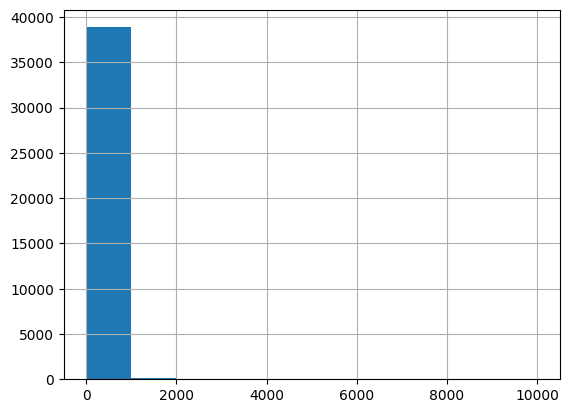

In [ ]:
train['price'].hist()

In [ ]:
train['price'].describe()

count    39116.000000
mean       153.057547
std        248.758522
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39102 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39100 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  last_review                     31063 non-null  object 
 12  reviews_per_month               

## 데이터 전처리 & 피처엔지니어링

In [ ]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,35742633,Luxury new 1 bed apartment in East Williamsburg,265866685,Mindy,Brooklyn,Bushwick,40.69796,-73.92915,Entire home/apt,30,0,NaN,NaN,2,179,198
1,15840089,Kid- (and Adult-) Friendly Uptown 2-Bedroom,99602138,Yolanda,Manhattan,Washington Heights,40.83490,-73.94829,Entire home/apt,3,36,2019-01-01,1.13,1,5,150
2,24495605,Brooklyn Art Residence,75173477,Lara,Brooklyn,Bushwick,40.69932,-73.91191,Entire home/apt,3,7,2019-05-05,0.48,1,6,200
3,16238779,Spacious Studio Duplex in Heart of Williamsburg!,36382944,Joshua,Brooklyn,Williamsburg,40.71520,-73.96230,Entire home/apt,31,2,2018-01-01,0.06,1,0,230
4,25265496,Beautiful large 2 br appartement in Brooklyn!,22935245,Anne,Brooklyn,Bedford-Stuyvesant,40.69168,-73.95397,Entire home/apt,21,1,2018-07-14,0.08,1,25,145


In [ ]:
train.nunique()
# name, host_name, last_review, host_id
# reviews_per_month -> 0

id                                39116
name                              38447
host_id                           30821
host_name                          9943
neighbourhood_group                   5
neighbourhood                       221
latitude                          17378
longitude                         13607
room_type                             3
minimum_nights                       94
number_of_reviews                   377
last_review                        1720
reviews_per_month                   903
calculated_host_listings_count       47
availability_365                    366
price                               638
dtype: int64

In [ ]:
cols = ['name', 'host_name', 'last_review', 'host_id']
print(train.shape)
train = train.drop(cols, axis=1)
test = test.drop(cols, axis=1)
print(train.shape)

(39116, 16)
(39116, 12)


In [ ]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
train.isnull().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [ ]:
train = train.drop('id', axis=1)
test_id = test.pop('id')
test.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Theater District,40.75965,-73.98652,Entire home/apt,29,0,0.00,327,338
1,Brooklyn,Bedford-Stuyvesant,40.68062,-73.94418,Entire home/apt,30,1,0.75,6,284
2,Brooklyn,Williamsburg,40.70665,-73.94061,Entire home/apt,4,50,0.51,1,331
3,Brooklyn,Bedford-Stuyvesant,40.68427,-73.95460,Private room,1,18,3.33,1,16
4,Manhattan,Harlem,40.82028,-73.95381,Private room,1,3,0.08,1,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   neighbourhood                   39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   room_type                       39116 non-null  object 
 5   minimum_nights                  39116 non-null  int64  
 6   number_of_reviews               39116 non-null  int64  
 7   reviews_per_month               39116 non-null  float64
 8   calculated_host_listings_count  39116 non-null  int64  
 9   availability_365                39116 non-null  int64  
 10  price                           39116 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.3+ MB


In [ ]:
cols =['neighbourhood_group', 'neighbourhood', 'room_type']
from sklearn.preprocessing import LabelEncoder

for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

train[cols]


,neighbourhood_group,neighbourhood,room_type
0,1,28,0
1,2,206,0
2,1,28,0
3,1,214,0
4,1,13,0
...,...,...,...
39111,1,214,1
39112,2,94,1
39113,1,19,0
39114,1,41,0


## 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train.drop('price', axis=1), train['price'],
                                            test_size=0.15, random_state=2022)

In [ ]:
X_tr.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
35316,2,73,40.70417,-74.01511,0,9,0,0.00,1,15
8181,2,94,40.80317,-73.95559,0,1,2,1.22,1,85
12102,1,30,40.63672,-73.88814,0,2,43,1.18,1,309
17438,1,91,40.72409,-73.95039,0,5,5,1.17,4,68
32851,2,103,40.85961,-73.92911,1,3,1,0.12,2,107


## 모델 & 평가

In [ ]:
# 평가
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def rmse(y_test, y_pred): #RMSE
    return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle(y_test, y_pred): #RMSLE
    return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))

def mape(y_test, y_pred): #MAPE
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_tr,y_tr)
pred=model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse: ",rmse(y_val, pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

r2:  0.08452239774949455
mae:  73.98120907242398
mse:  44813.52112975371
rmse:  211.69204314228182
rmsle:  0.6284667216270309
mape:  58.89870347351772


<ipython-input-62-7974537be08d>:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


In [ ]:
# 릿지
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_tr,y_tr)
pred=model.predict(X_val)
print(r2_score(y_val, pred))
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse: ",rmse(y_val, pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

0.08458002418498123
r2:  0.08458002418498123
mae:  73.94214514943883
mse:  44810.700259556594
rmse:  211.68538036330378
rmsle:  0.6215134552796238
mape:  58.858160278049674


<ipython-input-62-7974537be08d>:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


In [ ]:
# 라쏘
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_tr,y_tr)
pred=model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse: ",rmse(y_val, pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

r2:  0.07703411533588167
mae:  74.74494739225997
mse:  45180.079854230484
rmse:  212.5560628498526
rmsle:  0.6125581554187451
mape:  60.88580813651008


<ipython-input-62-7974537be08d>:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


In [ ]:
#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_tr,y_tr)
pred=model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse: ",rmse(y_val, pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

r2:  0.2514811608085512
mae:  66.04507185866849
mse:  36640.72690982778
rmse:  191.4176765866407
rmsle:  0.497521451611782
mape:  46.27067155530274


In [ ]:
# xgb
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_tr,y_tr)
pred=model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse: ",rmse(y_val, pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))


r2:  0.27382975057906367
mae:  69.4845834761025
mse:  35546.74165290938
rmse:  188.53843547910697
rmsle:  0.539464754735751
mape:  50.75761449102081


<ipython-input-62-7974537be08d>:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


## 예측 및 csv 제출

In [ ]:
test.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,191,40.75965,-73.98652,0,29,0,0.00,327,338
1,1,13,40.68062,-73.94418,0,30,1,0.75,6,284
2,1,214,40.70665,-73.94061,0,4,50,0.51,1,331
3,1,13,40.68427,-73.95460,1,1,18,3.33,1,16
4,2,94,40.82028,-73.95381,1,1,3,0.08,1,0


In [ ]:
pred = model.predict(test)

In [ ]:
pred

array([295.24023, 155.2168 , 171.65509, ..., 156.34984, 176.40002,
       181.71881], dtype=float32)

In [ ]:
pd.DataFrame({'id':test_id, 'output':pred}).to_csv("00000.csv", index=False)

In [ ]:
pd.read_csv("00000.csv")

,id,output
0,34323697,295.240230
1,29927138,155.216800
2,120362,171.655090
3,31838301,71.199670
4,7244824,49.833588
...,...,...
9774,15359119,52.398678
9775,23565653,112.063805
9776,9920191,156.349840
9777,4792342,176.400020


##정리

In [ ]:
y_test = pd.read_csv("y_test.csv")
print(r2_score(y_test, pred))

-0.03400982959617549
